In [2]:
import json
import urllib2   
query_url = 'http://wservice.viabicing.cat/v2/stations'
response = json.loads(urllib2.urlopen(query_url).read())  


request = "http://wservice.viabicing.cat/v2/stations"

res = json.loads(urllib2.urlopen(request).read())

print(type(res['stations']))

for i in range(0, len(res['stations'])):
	print(res['stations'][i]['id'])
	print('e-bike?\t' + str(res['stations'][i]['type'] == 'BIKE-ELECTRIC'))
	print(res['stations'][i]['latitude'])
	print(res['stations'][i]['longitude'])
	print(res['stations'][i]['slots'])
	print(res['stations'][i]['bikes'])
	print('- ' * 10)

<type 'list'>
1
e-bike?	False
41.397952
2.180042
8
14
- - - - - - - - - - 
2
e-bike?	False
41.39553
2.17706
9
18
- - - - - - - - - - 
3
e-bike?	False
41.393699
2.181137
9
17
- - - - - - - - - - 
4
e-bike?	False
41.39347
2.18149
4
12
- - - - - - - - - - 
5
e-bike?	False
41.391075
2.180223
18
20
- - - - - - - - - - 
6
e-bike?	False
41.391349
2.18061
26
12
- - - - - - - - - - 
7
e-bike?	False
41.388856
2.183251
3
24
- - - - - - - - - - 
8
e-bike?	False
41.389088
2.183568
9
17
- - - - - - - - - - 
9
e-bike?	False
41.385031
2.185249
5
12
- - - - - - - - - - 
10
e-bike?	False
41.38498
2.18417
31
2
- - - - - - - - - - 
11
e-bike?	False
41.381689
2.193914
0
20
- - - - - - - - - - 
12
e-bike?	False
41.384538
2.195679
11
17
- - - - - - - - - - 
13
e-bike?	False
41.386861
2.195761
25
6
- - - - - - - - - - 
14
e-bike?	False
41.384825
2.185074
12
9
- - - - - - - - - - 
15
e-bike?	False
41.39515
2.17076
11
9
- - - - - - - - - - 
16
e-bike?	False
41.39827
2.186708
9
8
- - - - - - - - - - 
17
e-bike?	

In [3]:
#finding distance between two coordinate points (lat&lon)

import math
#function to find distance between 2 coordinate points
def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

#example: station 1 and 2
lat1 = 41.397952; lat2 = 41.39553; long1 = 2.180042; long2 = 2.17706
print( distance((lat1, long1), (lat2, long2)) )

0.366606143076


In [4]:
import numpy as np

#create symmetric matrix of distances between 2 nodes
d = len(res['stations'])
A = np.zeros((d,d))

for i in range(0, len(res['stations'])):
    for j in range(i+1, len(res['stations'])):
        #print(res['stations'][i]['id']), (res['stations'][j]['id'])
        lat1 = float((res['stations'][i]['latitude']))
        #print lat1
        long1 = float((res['stations'][i]['longitude']))
        #print long1
        lat2 = float((res['stations'][j]['latitude']))
        #print lat2
        long2 = float((res['stations'][j]['longitude']))
        #print long2
        dist = (distance((lat1, long1), (lat2, long2)) )
        #print dist
        A[i, j] = dist
        A[j, i] = dist
        #print('- ' * 10)
        
print A

[[ 0.          0.36660614  0.4816518  ...,  1.54524915  3.45165     0.87121146]
 [ 0.36660614  0.          0.39637078 ...,  1.18552311  3.08680231
   1.0509322 ]
 [ 0.4816518   0.39637078  0.         ...,  1.39741765  3.22981512
   1.33916288]
 ..., 
 [ 1.54524915  1.18552311  1.39741765 ...,  0.          1.91467454
   1.89592722]
 [ 3.45165     3.08680231  3.22981512 ...,  1.91467454  0.          3.7584962 ]
 [ 0.87121146  1.0509322   1.33916288 ...,  1.89592722  3.7584962   0.        ]]


In [52]:
print time.ctime()

Mon May 29 16:32:59 2017


In [5]:
#create matrix of coordinates of nodes
#d = len(res['stations'])

xy = np.zeros((d,2))

for i in range(0, d):
        x = float((res['stations'][i]['latitude']))
        y = float((res['stations'][i]['longitude']))
        xy[i,:] = x, y
        
#print xy
Xn = xy[:,0]
Yn = xy[:,1]
Xn = Xn.tolist()
Yn = Yn.tolist()

#print "id 465", Xn[464]
#id = 1
#print Xn[id-1] #X-coordinate (first node)
#print Yn[id-1] #Y-coordinate (first node)

print len(Xn)

465


In [6]:
#set nodes labels to station-ids
labels = []

for i in range(0, d):
        l = (res['stations'][i]['id'])
        labels.append(l)

#print labels
print len(labels)

465


In [22]:
#sara code to get temporal data
import time
import urllib2 
import json
import numpy as np
print "Start : %s" % time.ctime()


def bicing_data():
    t = 0
    all_bicing=[]
    while t < 3:
        print t
        request = 'http://wservice.viabicing.cat/v2/stations'
        res = json.loads(urllib2.urlopen(request).read())
        all_bicing = np.append(all_bicing,res)
        #print res
        t += 1
        time.sleep(10)

    print "End : %s" % time.ctime()
    return all_bicing
    
data = bicing_data()



Start : Mon May 29 18:08:31 2017
0
1
2
End : Mon May 29 18:09:06 2017


In [78]:
import json

with open('data_mon_410pm_4hrs.json') as json_data:    
    data = json.load(json_data)

In [79]:
# create lists of empty stations and full stations
#for j in range(0,len(data)):
empty_stations = []
full_stations = []
colour_coded_nodes = []
for j in range(0,16):
    for i in range(0, d):
        #print "id", data[j]['stations'][i]['id']
        #print "bikes", data[j]['stations'][i]['bikes']
        #print "slots", data[j]['stations'][i]['slots']
        id2 = i
        data[j]['stations'][i].update({'id2':id2})
        #print data[j]['stations'][i]['id2'], data[j]['stations'][i]['id']
        if (float((data[j]['stations'][i]['slots']))+float((data[j]['stations'][i]['bikes']))) == 0:
            r = "CLS"
        else: 
            r = float((data[j]['stations'][i]['bikes']))/(float((data[j]['stations'][i]['slots']))+float((data[j]['stations'][i]['bikes'])))
        data[j]['stations'][i].update({'ratio':r})
        #print "ratio", data[j]['stations'][i]['ratio']
        if data[j]['stations'][i]['ratio'] < 0.15:
            empty_stations.append(int(data[j]['stations'][i]['id2']))
            data[j]['stations'][i].update({'ratio_label':'empty'})
            colour_coded_nodes.append(0)
        if data[j]['stations'][i]['ratio'] >= 0.15 and data[j]['stations'][i]['ratio'] < 0.50:  
            data[j]['stations'][i].update({'ratio_label':'almost-empty'})
            colour_coded_nodes.append(1)
        if data[j]['stations'][i]['ratio'] >= 0.50 and data[j]['stations'][i]['ratio'] < 0.85:
            data[j]['stations'][i].update({'ratio_label':'almost-full'})
            colour_coded_nodes.append(2)
        if data[j]['stations'][i]['ratio'] >= 0.85:
            full_stations.append(int(data[j]['stations'][i]['id2']))
            data[j]['stations'][i].update({'ratio_label':'full'}) 
            colour_coded_nodes.append(3)

#print len(colour_coded_nodes)


In [83]:
#try another way to find col
# create lists of empty stations and full stations
#for j in range(0,len(data)):
empty_stations = []
almost_empty_stations = []
almost_full_stations = []
full_stations = []

for j in range(0,17):
    for i in range(0, d):
        id2 = i
        data[j]['stations'][i].update({'id2':id2})   #add id2 so nodes are labelled in same way as edges
        #calc proportion of bikes in station, and add "ratio" to dict
        if (float((data[j]['stations'][i]['slots']))+float((data[j]['stations'][i]['bikes']))) == 0:
            r = "CLS"
        else: 
            r = float((data[j]['stations'][i]['bikes']))/(float((data[j]['stations'][i]['slots']))+float((data[j]['stations'][i]['bikes'])))
        data[j]['stations'][i].update({'ratio':r})
        #create groupings of stations by proportion full
        if data[j]['stations'][i]['ratio'] < 0.15:
            empty_stations.append(int(data[j]['stations'][i]['id2']))
            data[j]['stations'][i].update({'ratio_label':'empty'})
        if data[j]['stations'][i]['ratio'] >= 0.15 and data[j]['stations'][i]['ratio'] < 0.50:  
            almost_empty_stations.append(int(data[j]['stations'][i]['id2']))
            data[j]['stations'][i].update({'ratio_label':'almost_empty'})
        if data[j]['stations'][i]['ratio'] >= 0.50 and data[j]['stations'][i]['ratio'] < 0.85:
            almost_full_stations.append(int(data[j]['stations'][i]['id2']))
            data[j]['stations'][i].update({'ratio_label':'almost_full'})
        if data[j]['stations'][i]['ratio'] >= 0.85:
            full_stations.append(int(data[j]['stations'][i]['id2']))
            data[j]['stations'][i].update({'ratio_label':'full'}) 

print almost_full_stations


[12, 13, 15, 24, 28, 29, 32, 34, 37, 38, 44, 46, 48, 49, 53, 57, 59, 60, 61, 65, 67, 83, 88, 91, 102, 103, 108, 110, 111, 115, 119, 121, 123, 124, 126, 127, 129, 130, 137, 138, 143, 145, 148, 149, 150, 152, 155, 156, 157, 158, 162, 165, 166, 169, 172, 174, 175, 179, 180, 184, 206, 208, 215, 223, 235, 236, 248, 258, 260, 263, 264, 267, 272, 281, 285, 326, 337, 340, 341, 343, 345, 354, 368, 369, 376, 384, 385, 390, 392, 400, 401, 403, 404, 409, 413, 420, 422, 425, 428, 430, 432, 433, 435, 436, 437, 440, 441, 442, 443, 444, 446, 447, 448, 453, 455, 462, 1, 2, 3, 10, 12, 14, 15, 29, 32, 34, 37, 38, 43, 44, 45, 46, 48, 49, 50, 52, 55, 56, 57, 60, 61, 65, 67, 83, 88, 101, 102, 103, 105, 108, 110, 115, 119, 120, 121, 122, 123, 124, 129, 130, 137, 138, 143, 144, 145, 146, 149, 152, 153, 155, 156, 157, 160, 162, 165, 166, 172, 174, 175, 179, 184, 208, 209, 235, 236, 240, 248, 260, 263, 264, 267, 272, 281, 285, 326, 337, 340, 341, 343, 345, 350, 354, 364, 368, 369, 371, 376, 383, 384, 385, 390, 

In [81]:
#create list of edges
edges = []
for e in empty_stations:
    for f in full_stations:
        x = [e,f]
        edges.append(x)

print len(edges)

2501388


In [25]:
#plot stations(nodes) as coordinate points
import plotly
from plotly.graph_objs import *
import plotly.plotly as py
plotly.offline.init_notebook_mode(connected=True)

#edges

Xe=[]
Ye=[]
#print edges
for edge in edges:
    Xe+=[Xn[edge[0]],Xn[edge[1]], None]
    Ye+=[Yn[edge[0]],Yn[edge[1]], None]
    
trace1=Scatter(x=Xe,
               y=Ye,
               mode='lines',
               line=Line(color='rgb(210,210,210)', width=1),
               hoverinfo='none')
                
trace2=Scatter(x=Xn,
               y=Yn,
               mode='markers',
               name='Station',
               marker=Marker(symbol='dot',
                             size=10, 
                             color= colour_coded_nodes,
                             colorscale= 'Jet',
                             #showlegend = True,
                             line=Line(color='rgb(50,50,50)', width=0.5)
                             ),
               text=labels,
               hoverinfo='text'
               )

axis=dict(showline=False, # hide axis line, grid, ticklabels and  title
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title='' 
          )

width=800
height=800
layout=Layout(title= "Bicing stations plotted using coordinates",  #include time in title
    font= Font(size=12),
    showlegend=False,
    autosize=False,
    width=width,
    height=height,
    xaxis=XAxis(axis),
    yaxis=YAxis(axis),          
    margin=Margin(
        l=40,
        r=40,
        b=85,
        t=100,
    ),
    hovermode='closest',
    annotations=Annotations([
           Annotation(
           showarrow=False,  
            xref='paper',     
            yref='paper',     
            x=0,  
            y=-0.1,  
            xanchor='left',   
            yanchor='bottom',  
            font=Font(
            size=14 
            )     
            )
        ]),           
    )

#this is to add edges
data=Data([trace1, trace2])

fig = Figure(data=data, layout=layout)

plotly.offline.iplot(fig, filename='BicingStations')

In [46]:
print len(data[1]['stations'])
print len(data)


465
3


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
['2017-05-29 16:09:08', '2017-05-29 16:24:09', '2017-05-29 16:39:08', '2017-05-29 16:54:08', '2017-05-29 17:09:08', '2017-05-29 17:24:08', '2017-05-29 17:39:09', '2017-05-29 17:54:08', '2017-05-29 18:10:09', '2017-05-29 18:25:08', '2017-05-29 18:40:08', '2017-05-29 18:55:08', '2017-05-29 19:10:08', '2017-05-29 19:25:08', '2017-05-29 19:40:09', '2017-05-29 19:55:08', '2017-05-29 20:10:08']


ValueError: invalid literal for float(): 2017-05-29 16:09:08

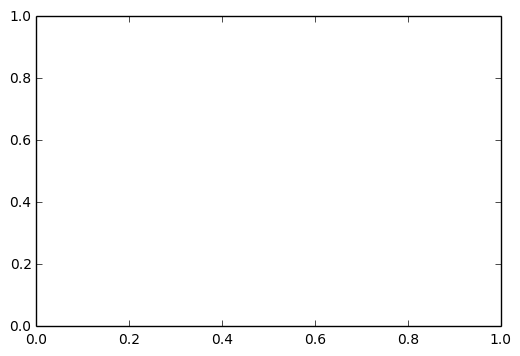

In [97]:
# Trying to convert data to networkX

import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import dates
% matplotlib inline


def bicing_network(dataset):
    n_stations = len(dataset[0]['stations'])

    temporal_networks = []
    temporal_degrees = []
    temporal_timestamp = []

    for t in range(0,len(dataset)):
        print t
        G_bicing = nx.Graph()

        for x in range (0, n_stations):
            G_bicing.add_node(x)
            
        for x in range (0, n_stations):
            for y in range (x, n_stations):
                
                if dataset[t]['stations'][x]['ratio_label'] == 'empty' and dataset[t]['stations'][y]['ratio_label'] == 'full' and (x != y): 
                    G_bicing.add_edge(x, y)
                if dataset[t]['stations'][y]['ratio_label'] == 'empty' and dataset[t]['stations'][x]['ratio_label'] == 'full' and (x != y):
                    G_bicing.add_edge(x, y)
        
        
        temporal_networks.append(G_bicing)
        temporal_degrees.append(np.average(G_bicing.degree().values()))
        temporal_timestamp.append(dataset[t]['updateTime'])
        
        #print temporal_degrees[t]
                                   
        
    return temporal_networks, temporal_degrees, temporal_timestamp




bicing_results = bicing_network(data)

temporal_timestamp_regular = []
for i in range(0,len(bicing_results[2])):
    temporal_timestamp_regular.append((datetime.datetime.fromtimestamp(int(bicing_results[2][i])
    ).strftime('%Y-%m-%d %H:%M:%S')
))
    
#temporal_timestamp_regular = dates.date2num(temporal_timestamp_regular)

print temporal_timestamp_regular
    
plt.plot(temporal_timestamp_regular,bicing_results[1])
plt.title('Average Degree over time')
ax.xaxis.set_major_locator(dates.MinuteLocator())
ax.xaxis.set_major_formatter(hfmt)
plt.show()


# G_bicing.number_of_edges()

# degree = G_bicing.degree().values()
# print degree
# degree_ave = np.average(degree)
# degree_min = np.min(degree)
# degree_max = np.max(degree)

# print 'Average degree:', degree_ave
# print 'Minimum degree:', degree_min
# print 'Maximum degree:', degree_max

# nx.draw(G_bicing,pos=nx.spring_layout(G_bicing))
# plt.show()





 

In [103]:
# temporal_timestamp_regular = []
# for i in range(0,len(bicing_results[2])):
#     print i
#     temporal_timestamp_regular.append((datetime.datetime.fromtimestamp(int(bicing_results[2][i])
#     ).strftime('%H:%M:%S')
# ))
    
# print temporal_timestamp_regular
from datetime import datetime

datetime_object = datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')
print datetime_object

print len(bicing_results[2],bicing_results[1])
print data[0]['updateTime']

2005-06-01 13:33:00


TypeError: len() takes exactly one argument (2 given)

In [87]:
import datetime
print(
    datetime.datetime.fromtimestamp(
        int("1496066948")
    ).strftime('%H:%M:%S')
)

16:09:08


ValueError: invalid literal for float(): 2017-05-29 16:09:08

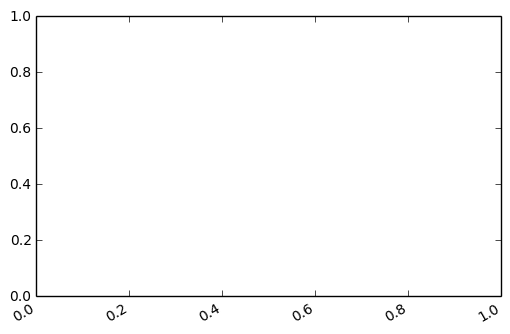

In [104]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

fig, ax = plt.subplots(1)
fig.autofmt_xdate()
plt.plot(temporal_timestamp_regular,bicing_results[1])


xfmt = mdates.DateFormatter('%y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)

plt.show()